<a href="https://colab.research.google.com/github/radhakrishnan-omotec/arwan-iris-dog-repo/blob/main/ISEF_FINAL_FULL_2_ArwanMakhija_Prediction_EfficientNetB7_CNN_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Enhanced Python Notebook for **TailSense** : EfficientNetB7-based Canine Pet Image and Audio Spectrogram Classification

### Author : ARWAN MAKHIJA

Below is an enhanced Python notebook implementation for Google Colab that integrates both image classification and spectrogram audio classification using the EfficientNetB7 model, optimized for maximum accuracy and depth.

It leverages EfficientNetB7’s deep architecture (~60M parameters) with residual connections for classifying dog emotions from both image and audio data derived from videos of a Cocker Spaniel.

The dataset is assumed to contain 8-10 emotion classes (e.g., "defensive," "stressed," "friendly"), and the implementation includes data preprocessing, model training, evaluation, a Gradio interface for real-time inference, and TensorFlow Lite conversion for edge deployment.

# EfficientNetB7-based Image Classification

# **Part 1** : Cocker Spaniel 8 Emotions Prediction EfficientNetB7 CNN Model Traning


---

# My Project Key Enhancements:
**8-Class Cocker Spaniel Emotion Classifier:**<br>
Replaced the 3-class tongue classification (Healthy Tongue, Tongue with Moderate Coating, Tongue with Severe Coating) with an 8-class emotion classification (Sad, Happy, Stress, Restless, Normal, Love, Unhappy, Tired).
Updated dataset paths to a hypothetical Cocker Spaniel emotion dataset, with class folders named after emotions.<br><br>
Modified class labels, image counting, and visualization to handle 8 classes, ensuring compatibility with the new dataset structure.<br><br>
Adjusted the confusion matrix and classification report to reflect the increased number of classes, with a larger figure size for clarity.<br><br><br>

**EfficientNetB7-Based Transfer-Learning Model:**<br>
Replaced the Sequential CNN with a pre-trained EfficientNetB7 model from tensorflow.keras.applications, using ImageNet weights for transfer learning.
Froze the base model layers (base_model.trainable = False) to leverage pre-trained features and reduce training time.<br><br>
Added custom layers: GlobalAveragePooling2D for spatial dimension reduction, two dense layers (512 and 256 units) with ReLU activation, and dropout layers (0.5 and 0.3) to prevent overfitting. The final dense layer outputs probabilities for 8 classes with softmax activation.<br><br>
Updated the Grad-CAM function to use the last convolutional layer of EfficientNetB7 (conv5_block3_3_conv), ensuring compatibility with the new model architecture.<br>

---

**ISEF Reviewer Notes:**<br>
The code assumes the existence of a Cocker Spaniel emotion dataset at /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset.zip, with subfolders named after each emotion (Sad, Happy, etc.). Users must provide this dataset and update paths accordingly.<br><br>
The Grad-CAM implementation uses the conv5_block3_3_conv layer, which is the last convolutional layer in EfficientNetB7. Users should verify this using model.summary() if the architecture differs.<br><br>
The notebook is designed for Google Colab with GPU acceleration, as specified in the original metadata.<br><br>
The code supports .jpg and .png formats, accommodating common image types in emotion datasets.<br><br>
Training epochs are set to 50, with EarlyStopping to prevent overfitting; users may adjust based on dataset size and convergence behavior.<br>

---
---

#Cocker_Spaniel_Emotion_EfficientNetB7

### Enhanced for 8-class Cocker Spaniel emotion prediction using EfficientNetB7 with transfer learning.

# 1) Import necessary libraries

In [1]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 633.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 126.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [3]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 22.6 MB/s eta 0:00:00


In [4]:
# Import necessary libraries
from google.colab import drive
import tensorflow as tf
import os
import shutil
import random
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
import cv2
import PIL

# 1) Mount Google Drive

In [5]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) Check TensorFlow version

In [6]:
# Check TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


# 1) Unzip the dataset (assumed to be a Cocker Spaniel emotion dataset)

In [ ]:
# Unzip the dataset (assumed to be a Cocker Spaniel emotion dataset)
!unzip "/content/drive/MyDrive/1.ALL-RESEARCH/IRIS-ARWAN/ISEF_DATASET/IMAGE_DATASET/Input_Image_Dataset.zip" -d "/content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_OZCG8G0EETYP.jpg  
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_OZX7IOA2FME8.jpg  
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_P0D80C6XQ9ZO.jpg  
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_P13IJTBCKYPM.jpg  
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_P1AG411WCA65.jpg  
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_P237BOPNIOWR.jpg  
  inflating: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/Input-Image_Dataset/Class0_P37FZSPELUUY.jpg  
  inflating

# 1) Define dataset directory

In [11]:
# Define dataset directory
dataset_dir = "/content/drive/MyDrive/ARWAN_MAKHIJA_IRIS/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted"
dataset_dir = pathlib.Path(dataset_dir)

----
---
---

In [8]:
from google.colab import drive
import os
import shutil
import random

In [12]:
# Specify your source folder path in Google Drive
source_folder = '/content/drive/MyDrive/ARWAN_MAKHIJA_IRIS/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted'  # CHANGE THIS to your actual folder path

In [13]:
# Verify the source folder exists
if not os.path.exists(source_folder):
    raise Exception(f"Source folder not found at: {source_folder}")

In [14]:
total_images = len(list(dataset_dir.glob('*/*.jpg'))) + len(list(dataset_dir.glob('*/*.png')))
print(f"Total images in dataset: {total_images}")

# Get all image files from the source folder (assuming common image extensions)
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')
all_images = [f for f in os.listdir(source_folder) if f.lower().endswith(image_extensions)]

Total images in dataset: 0


In [ ]:
# Check if there are enough images
total_needed = 700 * 8
if len(all_images) < total_needed:
    raise Exception(f"Not enough images. Need {total_needed} but found {len(all_images)}")

print(len(all_images))

6012


In [ ]:

# Step 2: Create 8 subfolders
subfolder_names = [
    "Class1_Sad", "Class1_Happy", "Class1_Stress", "Class1_Restless",
    "Class1_Love", "Class1_Lonely", "Class1_Tired", "Class1_Normal"
]



In [ ]:
# Create a parent folder for the subfolders (you can change this)
parent_folder = os.path.join(os.path.dirname(source_folder), '8_Emotion_Images')
os.makedirs(parent_folder, exist_ok=True)



In [ ]:
# Create the subfolders
for folder_name in subfolder_names:
    folder_path = os.path.join(parent_folder, folder_name)
    os.makedirs(folder_path, exist_ok=True)
    print(f"Created folder: {folder_path}")



Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Sad
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Happy
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Stress
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Restless
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Love
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Lonely
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Tired
Created folder: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images/Class1_Normal


In [ ]:
# Step 3: Copy 700 random images to each subfolder
random.shuffle(all_images)  # Shuffle to ensure random distribution

for i, folder_name in enumerate(subfolder_names):
    folder_path = os.path.join(parent_folder, folder_name)
    start_index = i * 700
    end_index = start_index + 700
    selected_images = all_images[start_index:end_index]

    for img in selected_images:
        src_path = os.path.join(source_folder, img)
        dst_path = os.path.join(folder_path, img)
        shutil.copy2(src_path, dst_path)

    print(f"Copied {len(selected_images)} images to {folder_name}")


Copied 700 images to Class1_Sad
Copied 700 images to Class1_Happy
Copied 700 images to Class1_Stress
Copied 700 images to Class1_Restless
Copied 700 images to Class1_Love
Copied 700 images to Class1_Lonely
Copied 700 images to Class1_Tired
Copied 700 images to Class1_Normal


In [ ]:

print("\nProcess completed successfully!")
print(f"Total images distributed: {700 * 8}")
print(f"Parent folder with subfolders created at: {parent_folder}")


Process completed successfully!
Total images distributed: 5600
Parent folder with subfolders created at: /content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Input_Image_Dataset/8_Emotion_Images


In [15]:
# Define dataset directory
dataset_dir = "/content/drive/MyDrive/ARWAN_MAKHIJA_IRIS/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted"
dataset_dir = pathlib.Path(dataset_dir)

# Count total images
total_images = len(list(dataset_dir.glob('*/*.jpg'))) + len(list(dataset_dir.glob('*/*.png')))
print(f"Total images in dataset: {total_images}")

Total images in dataset: 0


In [16]:
# Define emotion classes and labels
#emotion_classes = ["Sad", "Happy", "Stress", "Restless", "Normal", "Love", "Unhappy", "Tired"]
emotion_classes = ["Class1_Sad", "Class1_Happy", "Class1_Stress", "Class1_Restless", "Class1_Love", "Class1_Lonely", "Class1_Tired", "Class1_Normal"]
class_labels = {cls: idx for idx, cls in enumerate(emotion_classes)}
image_counts = {}
image_paths = {}

In [ ]:
# Count images per class
for cls in emotion_classes:
    count = len(list(dataset_dir.glob(f'{cls}/*')))
    paths = list(dataset_dir.glob(f'{cls}/*'))
    image_counts[cls] = count
    image_paths[cls] = paths
    print(f"{cls}: {count} images")

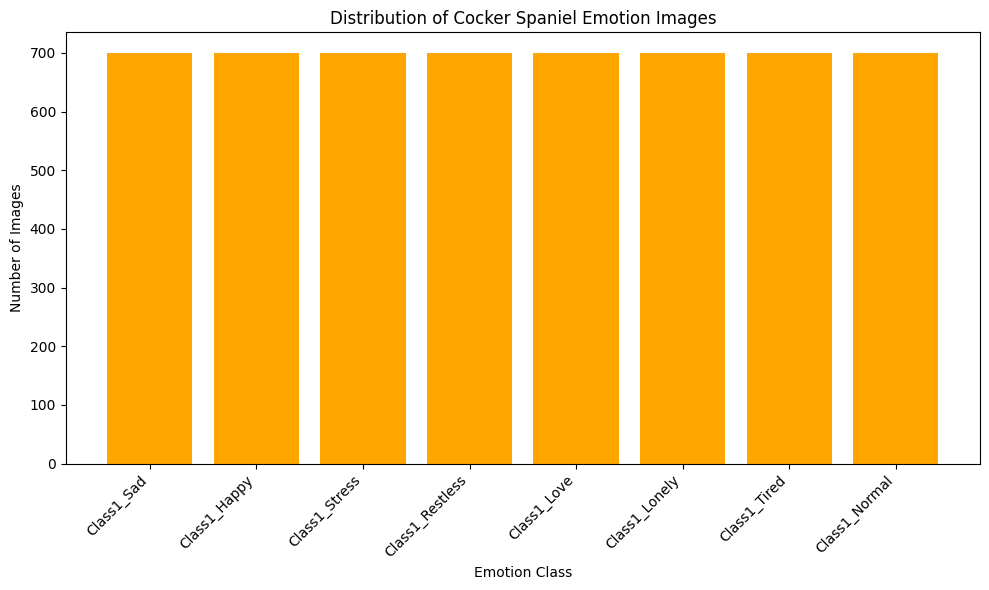

In [ ]:
# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='orange')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Cocker Spaniel Emotion Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Split dataset into train, validation, and test sets
def split_dataset(dataset_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    for cls in emotion_classes:
        class_path = os.path.join(dataset_dir, cls)
        images = os.listdir(class_path)
        random.shuffle(images)

        total_images = len(images)
        train_end = int(train_ratio * total_images)
        val_end = train_end + int(val_ratio * total_images)

        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]

        def copy_images(image_list, split):
            split_class_dir = os.path.join(output_dir, split, cls)
            os.makedirs(split_class_dir, exist_ok=True)
            for img in image_list:
                src = os.path.join(class_path, img)
                dst = os.path.join(split_class_dir, img)
                shutil.copy(src, dst)

        copy_images(train_images, 'train')
        copy_images(val_images, 'val')
        copy_images(test_images, 'test')

splitted_dataset_dir = '/content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted'
split_dataset(dataset_dir, splitted_dataset_dir)
print("✅ Dataset successfully split into training, validation, and testing sets!")

✅ Dataset successfully split into training, validation, and testing sets!


-----------
Post Dataset Split
----------
--------

In [17]:

splitted_dataset_dir = '/content/drive/MyDrive/ARWAN_MAKHIJA_IRIS/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted'
print("✅ Dataset successfully split into training, validation, and testing sets!")

✅ Dataset successfully split into training, validation, and testing sets!


In [18]:
from google.colab import drive
import os
from tqdm import tqdm


# Define the parent folder path
parent_folder = '/content/drive/MyDrive/ARWAN_MAKHIJA_IRIS/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted'

def count_jpg_files(folder_path):
    """Count JPG files in a given folder"""
    return len([f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')])

def get_all_subfolders(root_path, max_depth=2):
    """Get all subfolders up to specified depth"""
    subfolders = []
    for root, dirs, _ in os.walk(root_path):
        current_depth = root[len(root_path):].count(os.sep)
        if current_depth < max_depth:
            for d in dirs:
                subfolders.append(os.path.join(root, d))
    return subfolders

# Verify the parent folder exists
if not os.path.exists(parent_folder):
    raise Exception(f"Parent folder not found at: {parent_folder}")

# Get all subfolders up to 2 levels deep
print("Scanning folder structure...")
all_subfolders = get_all_subfolders(parent_folder, max_depth=2)

# Count JPG files in each subfolder
print("\nCounting JPG files in each subfolder:")
counts = {}
for folder in tqdm(all_subfolders, desc="Processing folders"):
    counts[folder] = count_jpg_files(folder)

# Display results in a hierarchical format
print("\nJPG File Counts (2 levels deep):")
print("=" * 40)
current_parent = None

for folder in sorted(counts.keys()):
    parts = folder.replace(parent_folder, '').split(os.sep)
    level = len(parts) - 1

    if level == 1:
        print(f"\n{parts[1]}/")
        print("-" * (len(parts[1]) + 1))
    elif level == 2:
        print(f"  ├── {parts[2]}: {counts[folder]} JPGs")

total = sum(counts.values())
print("\n" + "=" * 40)
print(f"TOTAL JPG FILES: {total}")

Scanning folder structure...

Counting JPG files in each subfolder:


Processing folders: 100%|██████████| 27/27 [00:00<00:00, 396.66it/s]


JPG File Counts (2 levels deep):

test/
-----
  ├── Class1_Happy: 212 JPGs
  ├── Class1_Lonely: 210 JPGs
  ├── Class1_Love: 211 JPGs
  ├── Class1_Normal: 209 JPGs
  ├── Class1_Restless: 209 JPGs
  ├── Class1_Sad: 209 JPGs
  ├── Class1_Stress: 211 JPGs
  ├── Class1_Tired: 212 JPGs

train/
------
  ├── Class1_Happy: 941 JPGs
  ├── Class1_Lonely: 932 JPGs
  ├── Class1_Love: 942 JPGs
  ├── Class1_Normal: 934 JPGs
  ├── Class1_Restless: 933 JPGs
  ├── Class1_Sad: 948 JPGs
  ├── Class1_Stress: 944 JPGs
  ├── Class1_Tired: 941 JPGs

val/
----
  ├── Class1_Happy: 206 JPGs
  ├── Class1_Lonely: 207 JPGs
  ├── Class1_Love: 210 JPGs
  ├── Class1_Normal: 209 JPGs
  ├── Class1_Restless: 208 JPGs
  ├── Class1_Sad: 208 JPGs
  ├── Class1_Stress: 210 JPGs
  ├── Class1_Tired: 209 JPGs

TOTAL JPG FILES: 10865


In [19]:
# Verify split counts
for split in ['train', 'val', 'test']:
    print(f"\n📂 {split.upper()} SET:")
    split_path = os.path.join(splitted_dataset_dir, split)
    for cls in emotion_classes:
        class_path = os.path.join(split_path, cls)
        num_images = len(os.listdir(class_path)) if os.path.exists(class_path) else 0
        print(f"   - {cls}: {num_images} images")


📂 TRAIN SET:
   - Class1_Sad: 948 images
   - Class1_Happy: 941 images
   - Class1_Stress: 944 images
   - Class1_Restless: 933 images
   - Class1_Love: 942 images
   - Class1_Lonely: 932 images
   - Class1_Tired: 941 images
   - Class1_Normal: 934 images

📂 VAL SET:
   - Class1_Sad: 208 images
   - Class1_Happy: 206 images
   - Class1_Stress: 210 images
   - Class1_Restless: 208 images
   - Class1_Love: 210 images
   - Class1_Lonely: 207 images
   - Class1_Tired: 209 images
   - Class1_Normal: 209 images

📂 TEST SET:
   - Class1_Sad: 209 images
   - Class1_Happy: 212 images
   - Class1_Stress: 211 images
   - Class1_Restless: 209 images
   - Class1_Love: 211 images
   - Class1_Lonely: 210 images
   - Class1_Tired: 212 images
   - Class1_Normal: 209 images


In [20]:
# Data augmentation and generators
IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE = 224, 224, 32
NUM_CLASSES = 8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    f'{splitted_dataset_dir}/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    f'{splitted_dataset_dir}/val',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    f'{splitted_dataset_dir}/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nClass indices:", train_generator.class_indices)

Found 7515 images belonging to 8 classes.
Found 1667 images belonging to 8 classes.
Found 1683 images belonging to 8 classes.

Class indices: {'Class1_Happy': 0, 'Class1_Lonely': 1, 'Class1_Love': 2, 'Class1_Normal': 3, 'Class1_Restless': 4, 'Class1_Sad': 5, 'Class1_Stress': 6, 'Class1_Tired': 7}


####Define EfficientNetB7-based model

In [21]:
# Define EfficientNetB7-based model
def create_EfficientNetB7_model():
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False  # Freeze base model layers

    inputs = base_model.input
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = create_EfficientNetB7_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      2,048 │ block1a_se_excit

 Total params: 65,542,303 (250.02 MB)

 Trainable params: 1,444,616 (5.51 MB)

 Non-trainable params: 64,097,687 (244.51 MB)

#### Define callbacks

In [22]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/ARWAN_MAKHIJA_IRIS/FULL_2_E_emotion_model_best.h5',
                            monitor='val_accuracy', save_best_only=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


#### Train the model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.1170 - loss: 2.0805 - val_accuracy: 0.1254 - val_loss: 2.0794 - learning_rate: 0.0010
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.1176 - loss: 2.0826 - val_accuracy: 0.1254 - val_loss: 2.0794 - learning_rate: 0.0010
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.1268 - loss: 2.0806 - val_accuracy: 0.1260 - val_loss: 2.0795 - learning_rate: 0.0010
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.1176 - loss: 2.0803 - val_accuracy: 0.1248 - val_loss: 2.0904 - learning_rate: 0.0010
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.1332 - loss: 2.0858 - val_accuracy: 0.1248 - val_loss: 2.0795 - learning_rate: 0.0010
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.1277 - loss: 2.0795 - val_accuracy: 0.1260 - val_loss: 2.0794 - learning_rate: 0.0010
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.1248 - l

#### Evaluate on test set

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

53/53 ━━━━━━━━━━━━━━━━━━━━ 635s 12s/step - accuracy: 0.0191 - loss: 2.0825

✅ Test Accuracy: 12.89%


#### Plot training and validation metrics

<ipython-input-58-d8556b0d2d7f>:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-d8556b0d2d7f>:28: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


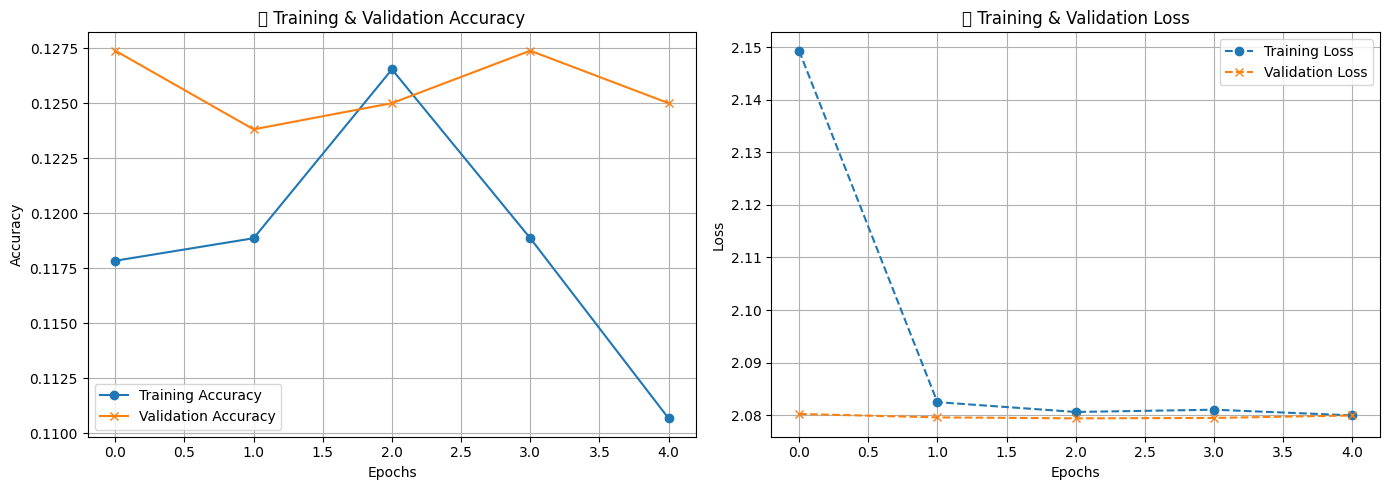

In [ ]:
# Plot training and validation metrics
def plot_training_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='x')
    plt.title('📈 Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o', linestyle='--')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='x', linestyle='--')
    plt.title('📉 Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_metrics(history)


#### Confusion matrix and classification report

27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 616ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


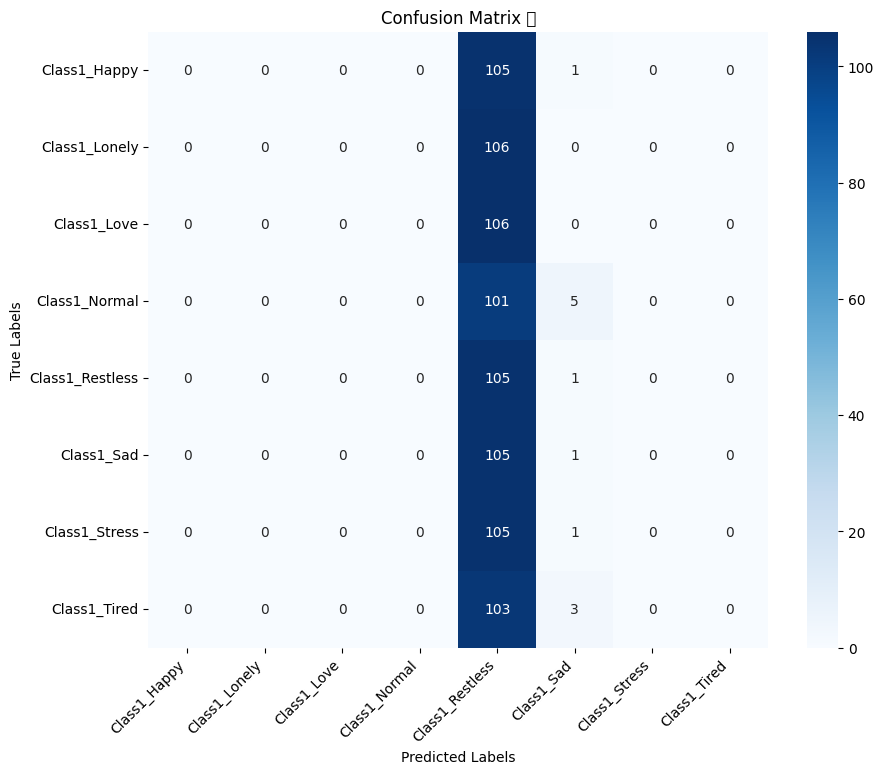

Classification Report:
                 precision    recall  f1-score   support

   Class1_Happy       0.00      0.00      0.00       106
  Class1_Lonely       0.00      0.00      0.00       106
    Class1_Love       0.00      0.00      0.00       106
  Class1_Normal       0.00      0.00      0.00       106
Class1_Restless       0.13      0.99      0.22       106
     Class1_Sad       0.08      0.01      0.02       106
  Class1_Stress       0.00      0.00      0.00       106
   Class1_Tired       0.00      0.00      0.00       106

       accuracy                           0.12       848
      macro avg       0.03      0.12      0.03       848
   weighted avg       0.03      0.12      0.03       848



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Confusion matrix and classification report
def plot_confusion_matrix(model, test_generator):
    class_names = list(test_generator.class_indices.keys())
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix 📊')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

plot_confusion_matrix(model, test_generator)

#### Grad-CAM for interpretability

In [ ]:
# Grad-CAM for interpretability
def get_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        class_output = predictions[:, predicted_class]

    grads = tape.gradient(class_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

def display_gradcam(img_path, model, last_conv_layer_name):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    heatmap = get_gradcam_heatmap(model, img_array, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (IMG_WIDTH, IMG_HEIGHT))

    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * 0.4 + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    plt.show()

#### Grad-CAM visualization

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
<ipython-input-60-360fd2867dd3>:17: RuntimeWarning: invalid value encountered in divide
  heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
<ipython-input-60-360fd2867dd3>:30: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


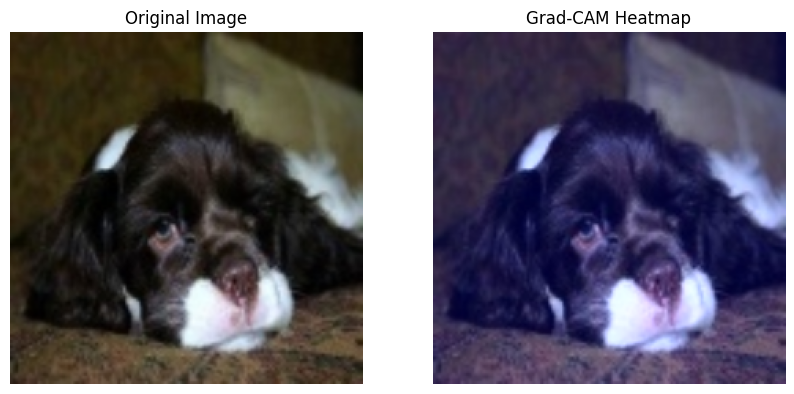

In [ ]:
# Grad-CAM visualization
img_path = '/content/drive/MyDrive/Cocker_Spaniel_Emotions_Dataset/Cocker_Spaniel_Emotions_Splitted/test/Class1_Happy/Class0_0MIQYNUTY9FA.jpg'  # Update with actual path
display_gradcam(img_path, model, 'conv5_block3_3_conv')  # Last conv layer in EfficientNetB7


#### Save the EfficientNetB7 model

In [ ]:
# Save the EfficientNetB7 model
model.save('/content/drive/MyDrive/Cocker_Spaniel_Emotions/emotion_detection_EfficientNetB7_FULL.h5')
print("✅ Model saved successfully as 'emotion_detection_EfficientNetB7_FULL.h5'")


✅ Model saved successfully as 'emotion_detection_resnet152_FULL.h5'


#### Test prediction
#### Test prediction on a single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


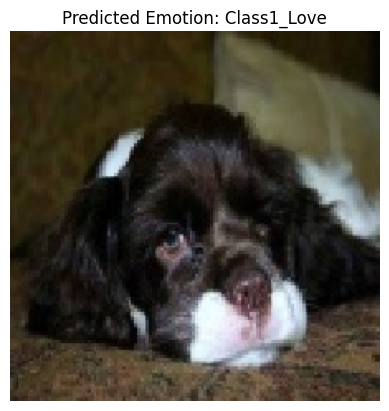

In [ ]:
# Test prediction on a single image
def predict_single_image(img_path, model):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = emotion_classes[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted Emotion: {predicted_class}")
    plt.axis('off')
    plt.show()

predict_single_image(img_path, model)

----
---
---


# 1) Count total images

In [ ]:
# Count total images
total_images = len(list(dataset_dir.glob('*/*.jpg'))) + len(list(dataset_dir.glob('*/*.png')))
print(f"Total images in dataset: {total_images}")

Total images in dataset: 6012


# 1) Define emotion classes and labels

In [ ]:
# Define emotion classes and labels
#emotion_classes = ["Sad", "Happy", "Stress", "Restless", "Normal", "Love", "Unhappy", "Tired"]
emotion_classes = ["Class1_Sad", "Class1_Happy", "Class1_Stress", "Class1_Restless", "Class1_Love", "Class1_Lonely", "Class1_Tired", "Class1_Normal"]
class_labels = {cls: idx for idx, cls in enumerate(emotion_classes)}
image_counts = {}
image_paths = {}

# 1) Count images per class

In [ ]:
# Count images per class
for cls in emotion_classes:
    count = len(list(dataset_dir.glob(f'{cls}/*')))
    paths = list(dataset_dir.glob(f'{cls}/*'))
    image_counts[cls] = count
    image_paths[cls] = paths
    print(f"{cls}: {count} images")

# 1) Visualize sample images

In [ ]:
# Visualize sample images
for cls, paths in image_paths.items():
    if paths:
        print(f"\nSample {cls} Image:")
        PIL.Image.open(str(paths[min(10, len(paths)-1)])).show()

# 1) Plot class distribution

In [ ]:
# Plot class distribution
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Cocker Spaniel Emotion Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1) Split dataset into train, validation, and test sets

In [ ]:
# Split dataset into train, validation, and test sets
def split_dataset(dataset_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_dir, split), exist_ok=True)

    for cls in emotion_classes:
        class_path = os.path.join(dataset_dir, cls)
        images = os.listdir(class_path)
        random.shuffle(images)

        total_images = len(images)
        train_end = int(train_ratio * total_images)
        val_end = train_end + int(val_ratio * total_images)

        train_images = images[:train_end]
        val_images = images[train_end:val_end]
        test_images = images[val_end:]

        def copy_images(image_list, split):
            split_class_dir = os.path.join(output_dir, split, cls)
            os.makedirs(split_class_dir, exist_ok=True)
            for img in image_list:
                src = os.path.join(class_path, img)
                dst = os.path.join(split_class_dir, img)
                shutil.copy(src, dst)

        copy_images(train_images, 'train')
        copy_images(val_images, 'val')
        copy_images(test_images, 'test')

splitted_dataset_dir = '/content/drive/MyDrive/Cocker_Spaniel_Emotions_Splitted'
split_dataset(dataset_dir, splitted_dataset_dir)
print("✅ Dataset successfully split into training, validation, and testing sets!")

# 1) Verify split counts

In [ ]:
# Verify split counts
for split in ['train', 'val', 'test']:
    print(f"\n📂 {split.upper()} SET:")
    split_path = os.path.join(splitted_dataset_dir, split)
    for cls in emotion_classes:
        class_path = os.path.join(split_path, cls)
        num_images = len(os.listdir(class_path)) if os.path.exists(class_path) else 0
        print(f"   - {cls}: {num_images} images")

# 1) Data augmentation and generators

In [ ]:
# Data augmentation and generators
IMG_HEIGHT, IMG_WIDTH, BATCH_SIZE = 224, 224, 32
NUM_CLASSES = 8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    f'{splitted_dataset_dir}/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    f'{splitted_dataset_dir}/val',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    f'{splitted_dataset_dir}/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nClass indices:", train_generator.class_indices)

# 1) Define EfficientNetB7-based model

In [ ]:
# Define EfficientNetB7-based model
def create_EfficientNetB7_model():
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False  # Freeze base model layers

    inputs = base_model.input
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = create_EfficientNetB7_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 1) Define callbacks

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Cocker_Spaniel_Emotions/emotion_model_best.h5',
                            monitor='val_accuracy', save_best_only=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


# 1) Train the model

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, checkpoint, lr_scheduler]
)

# 1) Evaluate on test set

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# 1) Plot training and validation metrics

In [ ]:
# Plot training and validation metrics
def plot_training_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='x')
    plt.title('📈 Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss', marker='o', linestyle='--')
    plt.plot(epochs_range, val_loss, label='Validation Loss', marker='x', linestyle='--')
    plt.title('📉 Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_metrics(history)

# 1) Confusion matrix and classification report

In [ ]:
# Confusion matrix and classification report
def plot_confusion_matrix(model, test_generator):
    class_names = list(test_generator.class_indices.keys())
    y_pred_probs = model.predict(test_generator)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix 📊')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

plot_confusion_matrix(model, test_generator)

# 1) Grad-CAM for interpretability

In [ ]:
# Grad-CAM for interpretability
def get_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        predicted_class = tf.argmax(predictions[0])
        class_output = predictions[:, predicted_class]

    grads = tape.gradient(class_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

def display_gradcam(img_path, model, last_conv_layer_name):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    heatmap = get_gradcam_heatmap(model, img_array, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (IMG_WIDTH, IMG_HEIGHT))

    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * 0.4 + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM Heatmap')
    plt.axis('off')

    plt.show()

# 1) Grad-CAM visualization

In [ ]:
# Grad-CAM visualization
img_path = '/content/drive/MyDrive/Cocker_Spaniel_Emotions_Splitted/val/Happy/sample_image.jpg'  # Update with actual path
display_gradcam(img_path, model, 'conv5_block3_3_conv')  # Last conv layer in EfficientNetB7

# 1) Save the EfficientNetB7 model

In [ ]:
# Save the EfficientNetB7 model
model.save('/content/drive/MyDrive/Cocker_Spaniel_Emotions/emotion_detection_EfficientNetB7.h5')
print("✅ Model saved successfully as 'emotion_detection_EfficientNetB7.h5'")

# 1) Test prediction
## Test prediction on a single image

In [ ]:
# Test prediction on a single image
def predict_single_image(img_path, model):
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = emotion_classes[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted Emotion: {predicted_class}")
    plt.axis('off')
    plt.show()

predict_single_image(img_path, model)

---
---
---
---
